<a href="https://colab.research.google.com/github/ColeLeal/Fraud_Detection_Project/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fraud Detection Machine learning project

##### Summary
Within this notebook I've sought to display a few data science skills on a binary classification data set involving<br> 
the detection of credit card fraud.

*   I have displayed some quick EDA in the beginning so that we may grasp some understanding of the data set.
*   Then I went into spot checking different types of models from ensemble to deep learning to see which models are viable in solving our problem.
*   I then attempted to remedy the unbalanced nature of the data set via over and undersampling methods.
*   Lastly I tuned the two best models from spot checking and came to the final/settled result.



##### Problem
Using the data we wish to be able classify whether or not a paticular transaction is fraudulent.

In [3]:
# Setting up google collab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
# random seed value
seed = 42

### Simple EDA
 - Note that a class value of 1 indicates fraud and 0 otherwise
    - Features <B>v1-v28</B> have been transformed via PCA to reduce feature dimenionality
    - <B>Time</B> refers to the amount of time between each transaction
    - <B>Amount</B> refers to Amount transfered per transaction

In [5]:
# Import data as dataframe
card_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Resume/creditcard.csv')
# Display top/bottom 10 data entries
display(card_df.head(10))
display(card_df.tail(10))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Check for duplicate entries
print("Number of duplicate: {}".format(card_df.duplicated().sum()))
# Drop duplicated entries
card_df.drop_duplicates(inplace=True)

Number of duplicate: 1081


Check how balanced the data is:

In [7]:
# Show shape of data:
# We can note the 284,807 number of entries
print(card_df.shape)

#Show the percentage of each class within the data
#Quite obviously the data is very imbalanced
display(pd.DataFrame(list(((card_df.Class.value_counts()/card_df.shape[0])*100)),
                           columns=['Class Count Percentages']))
display(pd.DataFrame(list(((card_df.Class.value_counts()))),
                           columns=['Class Counts']))

(283726, 31)


,Class Count Percentages
0,99.83329
1,0.16671


,Class Counts
0,283253
1,473


In [ ]:
# Create new dataframe with the features we can qualitatively understand
new_card_df = card_df[['Class','Time','Amount']].copy()

# Describe data
# Note that there are zero values in both amount and time 
new_card_df.describe()

,Class,Time,Amount
count,283726.000000,283726.000000,283726.000000
mean,0.001667,94811.077600,88.472687
std,0.040796,47481.047891,250.399437
min,0.000000,0.000000,0.000000
25%,0.000000,54204.750000,5.600000
50%,0.000000,84692.500000,22.000000
75%,0.000000,139298.000000,77.510000
max,1.000000,172792.000000,25691.160000


In [ ]:
# We can note that there is no null data
display(card_df.info())
# We can check the unique values just to see if theres anything odd
display(card_df.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

None

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

NOTE: The data looks quite clean.

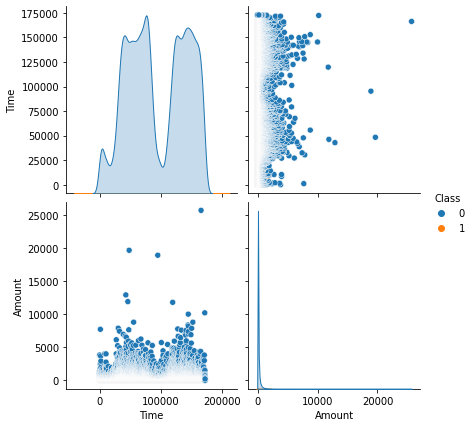

In [ ]:
# Create a pair plot to look at relations between time and amount w/ respect to Class
sns.pairplot(new_card_df,height=3,hue='Class')

    We can already note that fraudulent purchases tend to be lower than $5000 (this is likely due to card spending limits).
    (or atleast the plot used to show this more clearly?)

In [ ]:
# Check power score
import ppscore as pps

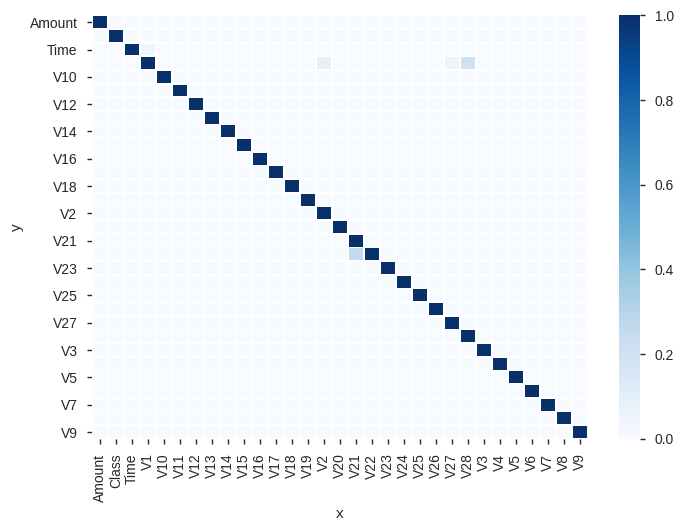

In [ ]:
# We can easily see that there is no ppscore indicating that the features are all pretty independant
matrix_df = pps.matrix(card_df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=False)

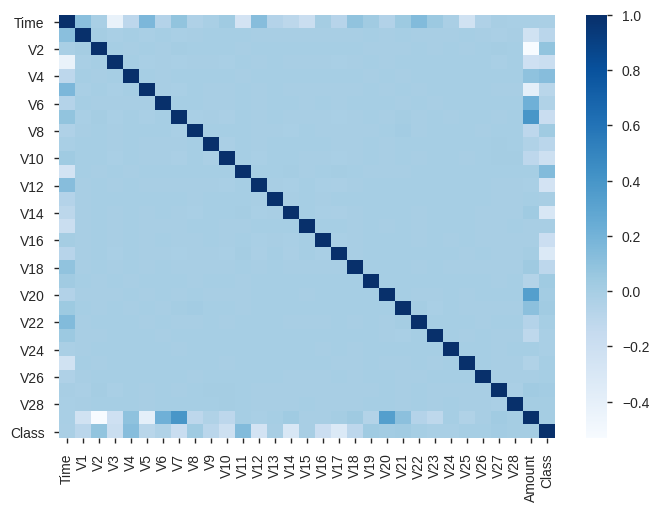

In [ ]:
# Correlation matrix
## We can easily see that there is no correlation between any of the features.
## This is relevant information as it allows us to determine whether or not
## we can drop certain features. In this case there's no real reason to do this,
from sklearn import metrics
sns.heatmap(card_df.corr(),cmap='Blues')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87409a6790>,
      dtype=object)

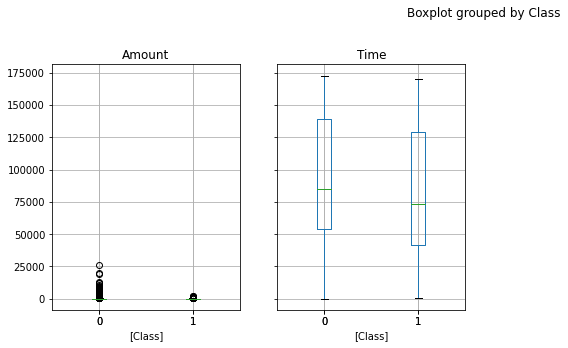

In [ ]:
# Below we can see that there is great over lap in time distribution indicating that
# time is not an important factor in whether or not a transaction is fraudulent
new_card_df.boxplot(by='Class', layout = (2,4), figsize=(15,10))

array([[<AxesSubplot:title={'center':'V1'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V10'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V11'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V12'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V13'}, xlabel='[Class]'>],
       [<AxesSubplot:title={'center':'V14'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V15'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V16'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V17'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V18'}, xlabel='[Class]'>],
       [<AxesSubplot:title={'center':'V19'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V2'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V20'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V21'}, xlabel='[Class]'>,
        <AxesSubplot:title={'center':'V22'}, xlabel='[Class]'>],
       [<AxesSubplot:title={'center':'V

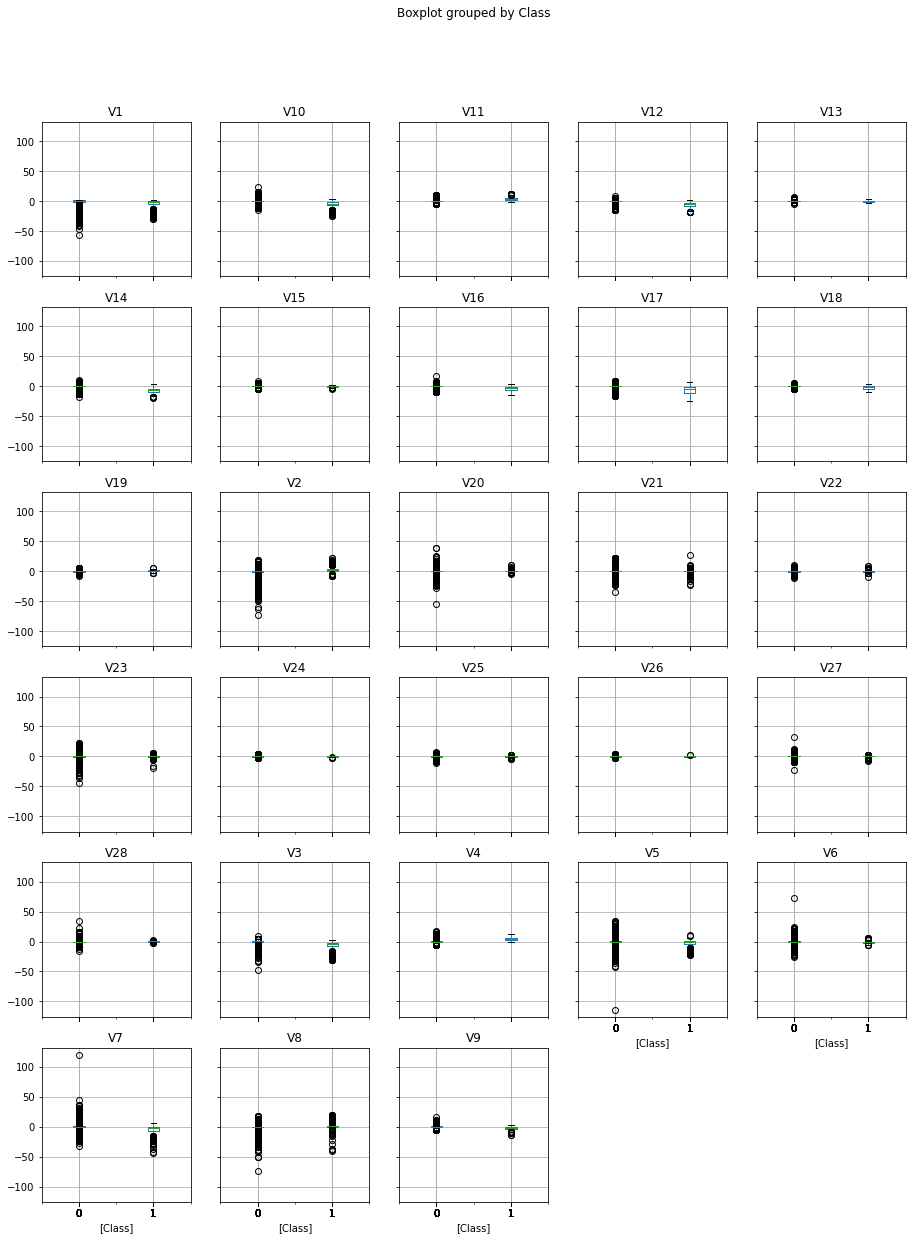

In [ ]:
# We can quickly look how the values are distributed for each feature per class (fruadulent or not)
# Ideally there would be different medians indicating a functional dependance to the class
card_df.drop(['Amount','Time'],axis=1).boxplot(by='Class',layout = (6,5),figsize=(15,20))

### Model Selection (Spot Checking)
-- Here we evaluate many different types of untuned models to check for a model that may work well with the data/problem.

#### Traditional ML spotchecking

In [8]:
## Singular models
# Import the many different model types
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# Ensemble models
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

In [9]:
from sklearn.model_selection import train_test_split
# Seperate labels and Class in different vars
X = card_df.drop('Class', axis=1)
y = card_df.Class

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=seed)

In [10]:
# Before we can fit we need to standardize the data
from sklearn.preprocessing import StandardScaler

# Define scaler
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

In [13]:
lg = LogisticRegression(random_state=seed)
svc = SVC(random_state=seed)
sgd = SGDClassifier(random_state=seed)
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=seed)

# dict of models
models = {
    'lg': lg,
    'svc':svc,
    'sgd':sgd,
    'gnb':gnb,
    'dt':dt
}
# Show all the models and their default parameters
models

{'dt': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 'gnb': GaussianNB(priors=None, var_smoothing=1e-09),
 'lg': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'sgd': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_rati

In [11]:
# Function that will evaluate our tradition ML models and print out results
from sklearn import metrics
def evaluate_ml_model (model,model_name,X_train,y_train) :
  model = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  print(f'-->{model_name} model -- acc: {acc}, recall:{recall}\n')

In [14]:
from sklearn import metrics
# Evaluate singular models
# Unsurprisingly we see that the decision tree is the best nonensemble model
## NOTE: recall is the most important metric here as our data is very imbalanced
for model_name,model in models.items():
  evaluate_ml_model(model,model_name,X_train,y_train)

-->lg model -- acc: 0.9991658638595832, recall:0.5522388059701493

-->svc model -- acc: 0.9993655865974295, recall:0.6343283582089553

-->sgd model -- acc: 0.9990248831034564, recall:0.44029850746268656

-->gnb model -- acc: 0.9777837825136869, recall:0.7910447761194029

-->dt model -- acc: 0.9990953734815198, recall:0.7611940298507462



In [ ]:
# Need to set some random seeds
# Ensemble models
rf = RandomForestClassifier(random_state=seed)
ab = AdaBoostClassifier(random_state=seed)
bc = BaggingClassifier(random_state=seed)
gb = GradientBoostingClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed)

models_e = {
    'rf':rf,
    'ab':ab,
    'bc':bc,
    'gb':gb,
    'xgb':xgb
}
models_e

{'ab': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=42),
 'bc': BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                   max_features=1.0, max_samples=1.0, n_estimators=10,
                   n_jobs=None, oob_score=False, random_state=42, verbose=0,
                   warm_start=False),
 'gb': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=42, subsample=

In [ ]:
# Evaluate ensemble models
for model_name,model in models_e.items():
  evaluate_ml_model(model,model_name,X_train,y_train)

-->rf model -- acc: 0.9995065673535563, recall:0.7238805970149254

-->ab model -- acc: 0.9992481026339904, recall:0.6343283582089553

-->bc model -- acc: 0.9995183157499001, recall:0.753731343283582

-->gb model -- acc: 0.999060128292488, recall:0.47761194029850745

-->xgb model -- acc: 0.9995183157499001, recall:0.7388059701492538



NOTE: We see that the decision tree (recall:0.761) and bagging models (recall:0.746) are the two best models so we shall explore and evaluate them further.

#### DL spot check
  -We spot check a simple neural network model

In [15]:
# Create basic DL model
from tensorflow.keras import Sequential
import tensorflow as tf
import tensorflow.keras.layers as layers
# Set random seed
from numpy.random import seed as np_seed
np_seed(42)
tf.random.set_seed(seed)

In [16]:
# Dataframe that holds recall and accuracy values of each notable model
models_summary = pd.DataFrame(columns=['mdl_name','accuracy','recall'])

In [17]:
# Function that creates a DL model
def Create_Basemodel ():
  model_dl = Sequential([
    layers.Dense(activation='relu',input_dim=30,units=16,kernel_initializer='uniform'),
    layers.Dense(16,activation='relu',kernel_initializer='uniform'),
    layers.Dense(1,activation='sigmoid',kernel_initializer='uniform')
    ])
  # Compile model
  model_dl.compile(loss='binary_crossentropy', optimizer='adam',metrics=['Recall','accuracy'])
  return model_dl

In [18]:
# Function to evaluate DL base model
def Evaluate_DL_Model (model_name,model_dl,X_train, y_train):
  train_eval = model_dl.evaluate(X_train,y_train,verbose=0)
  test_eval = model_dl.evaluate(X_test,y_test,verbose=0)
  train_str = f'-->{model_name} train -- accuracy: {train_eval[2]}, recall:{train_eval[1]}'
  test_str = f'-->{model_name} test -- accuracy: {test_eval[2]}, recall:{test_eval[1]}'
  #print(train_str)
  #print(test_str)
  models_summary.loc[len(models_summary),:] = [model_name,test_eval[2],test_eval[1]]
  return train_str, test_str

In [19]:
model_dl = Create_Basemodel()

In [20]:
# Add early stopping for the sake of efficiency (and time)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

In [21]:
# Now we can fit and evaluate the model
history = model_dl.fit(X_train,y_train,epochs=16,batch_size=100,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stopping])

Epoch 1/16
1987/1987 [==============================] - 11s 4ms/step - loss: 0.1246 - recall: 0.0000e+00 - accuracy: 0.9976 - val_loss: 0.0041 - val_recall: 0.0000e+00 - val_accuracy: 0.9984
Epoch 2/16
1987/1987 [==============================] - 7s 4ms/step - loss: 0.0039 - recall: 0.0000e+00 - accuracy: 0.9983 - val_loss: 0.0037 - val_recall: 0.0000e+00 - val_accuracy: 0.9984
Epoch 3/16
1987/1987 [==============================] - 7s 4ms/step - loss: 0.0033 - recall: 0.0197 - accuracy: 0.9984 - val_loss: 0.0035 - val_recall: 0.7164 - val_accuracy: 0.9994
Epoch 4/16
1987/1987 [==============================] - 7s 4ms/step - loss: 0.0034 - recall: 0.7654 - accuracy: 0.9993 - val_loss: 0.0031 - val_recall: 0.7761 - val_accuracy: 0.9995
Epoch 5/16
1987/1987 [==============================] - 7s 4ms/step - loss: 0.0021 - recall: 0.8294 - accuracy: 0.9996 - val_loss: 0.0031 - val_recall: 0.7687 - val_accuracy: 0.9995
Epoch 6/16
1987/1987 [==============================] - 7s 4ms/step - los

In [22]:
print(Evaluate_DL_Model('DL model',model_dl,X_train,y_train))

('-->DL model train -- accuracy: 0.9995367527008057, recall:0.8495575189590454', '-->DL model test -- accuracy: 0.9994713068008423, recall:0.7761194109916687')


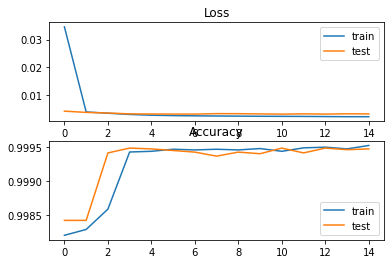

In [24]:
## Plot learning curves (Loss curves)
# The two plots below show that are model is not learning
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
print()

# Evaluate model (Accuracy curve)
## Plot learning curves (Loss curves)
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()

NOTE: Signs of overfitting are revealed as the loss on the training data decreased while loss on the test data remained unchanged.<br>
This is unsurprising as our data is very unbalanced.

NOTE: So after a quick spot checking ill look further into tuning the DL (recall:0.776) and  GaussianNB (recall:0.791).

### Deal with the data imbalance
  - Use oversampling and undersampling to see if we can positively address the issue of the imbalanced dataset

#### Random Oversampling

In [25]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:
## Random oversampling
oversample = RandomOverSampler(sampling_strategy=1)
X_over,y_over = oversample.fit_resample(X_train,y_train)
# As a result of oversampling there are just as many of each class cases
df = pd.DataFrame(y_over)
df.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    198269
0    198269
dtype: int64

In [27]:
# Lets refit and revaluate our best performing model (gnb)
gnb = GaussianNB()
evaluate_ml_model(gnb,'Gnb model',X_over,y_over)

-->Gnb model model -- acc: 0.9732606499212857, recall:0.8134328358208955



In [29]:
# Refit/evaluate dl model
model_dl = Create_Basemodel()
# Now we can fit and evaluate the model
history = model_dl.fit(X_over,y_over,epochs=16,batch_size=100,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stopping])
#Evaluate model 
Evaluate_DL_Model('Random Over DL',model_dl,X_over,y_over)

Epoch 1/16
3966/3966 [==============================] - 13s 3ms/step - loss: 0.1270 - recall: 0.9563 - accuracy: 0.9694 - val_loss: 0.0209 - val_recall: 0.8284 - val_accuracy: 0.9943
Epoch 2/16
3966/3966 [==============================] - 13s 3ms/step - loss: 0.0103 - recall: 0.9998 - accuracy: 0.9979 - val_loss: 0.0172 - val_recall: 0.8209 - val_accuracy: 0.9970
Epoch 3/16
3966/3966 [==============================] - 12s 3ms/step - loss: 0.0067 - recall: 0.9999 - accuracy: 0.9986 - val_loss: 0.0184 - val_recall: 0.8209 - val_accuracy: 0.9977
Epoch 4/16
3966/3966 [==============================] - 12s 3ms/step - loss: 0.0050 - recall: 0.9998 - accuracy: 0.9990 - val_loss: 0.0211 - val_recall: 0.8134 - val_accuracy: 0.9976
Epoch 5/16
3966/3966 [==============================] - 12s 3ms/step - loss: 0.0050 - recall: 0.9998 - accuracy: 0.9991 - val_loss: 0.0214 - val_recall: 0.8284 - val_accuracy: 0.9980
Epoch 6/16
3966/3966 [==============================] - 13s 3ms/step - loss: 0.0041 -

('-->Random Over DL train -- accuracy: 0.9993972778320312, recall:1.0',
 '-->Random Over DL test -- accuracy: 0.998049795627594, recall:0.8134328126907349')

Note: Both models performed better after oversampling though the DL model continues to show signs of overfitting (recall score decreases for each epoch).<br>
Note: The DL model shows promise after the first epoch (recall score of 0.8284).

#### Undersampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=.5)
X_under,y_under = undersample.fit_resample(X_train,y_train)
# As a result of oversampling there are just as many of each class cases
df = pd.DataFrame(y_under)
df.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0    678
1    339
dtype: int64

In [31]:
# Lets refit and revaluate our best performing model (gnb)
gnb = GaussianNB()
evaluate_ml_model(gnb,'Gnb model',X_under,y_under)

-->Gnb model model -- acc: 0.9721563006649593, recall:0.7985074626865671



In [33]:
# Refit/evaluate dl model
model_dl = Create_Basemodel()
# Now we can fit and evaluate the model
history = model_dl.fit(X_under,y_under,epochs=16,batch_size=100,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stopping])
#Evaluate model 
Evaluate_DL_Model('Random Under DL',model_dl,X_under,y_under)

Epoch 1/16
11/11 [==============================] - 3s 198ms/step - loss: 0.6920 - recall: 0.3920 - accuracy: 0.7291 - val_loss: 0.6864 - val_recall: 0.6343 - val_accuracy: 0.9992
Epoch 2/16
11/11 [==============================] - 2s 171ms/step - loss: 0.6842 - recall: 0.7295 - accuracy: 0.9090 - val_loss: 0.6778 - val_recall: 0.7612 - val_accuracy: 0.9993
Epoch 3/16
11/11 [==============================] - 2s 165ms/step - loss: 0.6676 - recall: 0.7960 - accuracy: 0.9310 - val_loss: 0.6665 - val_recall: 0.7612 - val_accuracy: 0.9992
Epoch 4/16
11/11 [==============================] - 2s 166ms/step - loss: 0.6340 - recall: 0.8156 - accuracy: 0.9385 - val_loss: 0.6495 - val_recall: 0.7687 - val_accuracy: 0.9990
Epoch 5/16
11/11 [==============================] - 2s 168ms/step - loss: 0.5862 - recall: 0.8152 - accuracy: 0.9361 - val_loss: 0.6247 - val_recall: 0.7836 - val_accuracy: 0.9982
Epoch 6/16
11/11 [==============================] - 2s 169ms/step - loss: 0.5192 - recall: 0.8504 - 

('-->Random Under DL train -- accuracy: 0.9606686234474182, recall:0.8908554315567017',
 '-->Random Under DL test -- accuracy: 0.9917995929718018, recall:0.8507462739944458')

NOTE: -Both models perform better with both random undersampling and oversampling.<br>
-Deeplearning model on the undersampled data had a high recall of .85



#### Synthetic sampling (SMOTE)
 -An oversampling method that creates synthetic data<br>
 -Here we eventually tested combining SMOTE with Random undersampling

In [34]:
# Combination of over and undersampling
from imblearn.over_sampling import SMOTE
oversample_s = SMOTE(sampling_strategy=.3)
undersample_s = RandomUnderSampler(sampling_strategy=1)


In [35]:
from imblearn.pipeline import Pipeline
# create pipeline of over/under sampling
steps = [('o',oversample_s),('u',undersample_s)]
pipeline = Pipeline(steps=steps)


In [36]:
X_over_u, y_over_u = pipeline.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
# Lets refit and revaluate our best performing model (gnb)
gnb = GaussianNB()
evaluate_ml_model(gnb,'Gnb model',X_over_u,y_over_u)

-->Gnb model model -- acc: 0.9754223548485632, recall:0.8208955223880597



In [39]:
# Refit/evaluate dl model
model_dl = Create_Basemodel()
# Now we can fit and evaluate the model
history = model_dl.fit(X_over_u,y_over_u,epochs=16,batch_size=100,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stopping])
#Evaluate model 
Evaluate_DL_Model('SMOTE w/ under DL',model_dl,X_under,y_under)

Epoch 1/16
1190/1190 [==============================] - 6s 4ms/step - loss: 0.2414 - recall: 0.8893 - accuracy: 0.9370 - val_loss: 0.0403 - val_recall: 0.8507 - val_accuracy: 0.9856
Epoch 2/16
1190/1190 [==============================] - 5s 4ms/step - loss: 0.0315 - recall: 0.9935 - accuracy: 0.9904 - val_loss: 0.0284 - val_recall: 0.8433 - val_accuracy: 0.9905
Epoch 3/16
1190/1190 [==============================] - 5s 4ms/step - loss: 0.0167 - recall: 0.9994 - accuracy: 0.9962 - val_loss: 0.0199 - val_recall: 0.8358 - val_accuracy: 0.9947
Epoch 4/16
1190/1190 [==============================] - 5s 4ms/step - loss: 0.0107 - recall: 0.9998 - accuracy: 0.9976 - val_loss: 0.0195 - val_recall: 0.8284 - val_accuracy: 0.9954
Epoch 5/16
1190/1190 [==============================] - 5s 4ms/step - loss: 0.0079 - recall: 0.9999 - accuracy: 0.9984 - val_loss: 0.0171 - val_recall: 0.8134 - val_accuracy: 0.9966
Epoch 6/16
1190/1190 [==============================] - 5s 4ms/step - loss: 0.0065 - recal

('-->SMOTE w/ under DL train -- accuracy: 0.9970501661300659, recall:1.0',
 '-->SMOTE w/ under DL test -- accuracy: 0.9976738095283508, recall:0.8059701323509216')

In [40]:
# Show best of the DL models
models_summary

,mdl_name,accuracy,recall
0,DL model,0.999471,0.776119
1,Random Over DL,0.99805,0.813433
2,Random Under DL,0.9918,0.850746
3,SMOTE w/ under DL,0.997674,0.80597


NOTE: After using SMOTE by itself and combining it with undersampling I found it to be a less effective resampling method than just undersampling

### Model Tuning
 -Improve selective models by changing parameters (using TuneSearch)

In [43]:
# NOTE: TuneSearch is a faster version of tune-sklearn's Grid/Random Search
#!pip install tune-sklearn
from tune_sklearn import TuneGridSearchCV

In [44]:
import numpy as np
param_dists = {
      'var_smoothing' : np.logspace(0,-9,num=100)
}

gnb = GaussianNB()

rs_gnb = TuneGridSearchCV(
    GaussianNB(),
    param_dists,
    early_stopping="MedianStoppingRule",
    max_iters=10,
)

In [45]:
# Lets refit and revaluate our tuned gnb model
evaluate_ml_model(rs_gnb,'Tuned Gnb model',X_over_u,y_over_u)

-->Tuned Gnb model model -- acc: 0.9763269813670434, recall:0.8208955223880597



NOTE: In the future it may be worthwhile to test and tune another more traditional ML model that has more tunable parameters than this one. <br>
Though the method for tuning said future model would be similar.

In [152]:
# Now we tune the DL model
#!pip install keras-tuner
import kerastuner as kt
print(kt.__version__)

1.0.2


In [153]:
# Tune with keras Tuner
from kerastuner import HyperModel
class ClassificationHyperModel (HyperModel):
  def __init__(self, input_shape):
    self.input_shape = input_shape

  def build (self, hp) :
    model = Sequential()
    model.add(
        layers.Dense(
            units=hp.Int('units',16,64,4, default=16),
            activation=hp.Choice(
                'dense_activation',
                values=['relu','tanh','sigmoid'],
                default='relu'),
            input_shape=input_shape
            )
        )
    model.add(
        layers.Dense(
            units=hp.Int('units',16,64,4, default=16),
            activation=hp.Choice(
                'dense_activation',
                values=['relu','tanh','sigmoid'],
                default='relu')
            )
        )
    model.add(layers.Dense(1,activation='sigmoid'))
    hp_learning_rate = hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4])
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  metrics=['Recall','accuracy'])

    return model

In [154]:
# Instantiate Hypermodel
input_shape = (X_under.shape[1],)
hypermodel = ClassificationHyperModel(input_shape)

In [155]:
# Instantiate our random search
tuner_rs = kt.RandomSearch(
            hypermodel,
            objective='val_loss',
            seed=seed,
            max_trials=10,
            executions_per_trial=2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [156]:
# Run the random search and get the best parameters
tuner_rs.search(X_under,y_under,epochs=10,validation_split=0.2,verbose=0)

best_hps = tuner_rs.get_best_hyperparameters(num_trials=1)[0]

INFO:tensorflow:Oracle triggered exit


In [157]:
# Build and train tuned model and find optimal number of epochs
tuned_model = tuner_rs.hypermodel.build(best_hps)
history = tuned_model.fit(X_under,y_under,epochs=50,validation_split=0.2)

val_rec_per_epoch = history.history['val_recall']
best_epoch = val_rec_per_epoch.index(max(val_rec_per_epoch)) +1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
26/26 [==============================] - 1s 13ms/step - loss: 0.7099 - recall: 0.6414 - accuracy: 0.5270 - val_loss: 0.2796 - val_recall: 0.8775 - val_accuracy: 0.8775
Epoch 2/50
26/26 [==============================] - 0s 5ms/step - loss: 0.5200 - recall: 0.8415 - accuracy: 0.7618 - val_loss: 0.2138 - val_recall: 0.8971 - val_accuracy: 0.8971
Epoch 3/50
26/26 [==============================] - 0s 5ms/step - loss: 0.3915 - recall: 0.8495 - accuracy: 0.8876 - val_loss: 0.1898 - val_recall: 0.8922 - val_accuracy: 0.8922
Epoch 4/50
26/26 [==============================] - 0s 5ms/step - loss: 0.2799 - recall: 0.8670 - accuracy: 0.9513 - val_loss: 0.1831 - val_recall: 0.9020 - val_accuracy: 0.9020
Epoch 5/50
26/26 [==============================] - 0s 5ms/step - loss: 0.1859 - recall: 0.9136 - accuracy: 0.9755 - val_loss: 0.1986 - val_recall: 0.9069 - val_accuracy: 0.9069
Epoch 6/50
26/26 [==============================] - 0s 5ms/step - loss: 0.1417 - recall: 0.8595 - accuracy: 0

In [158]:
# Reinstantiate and fit model one more time
hypermodel = tuner_rs.hypermodel.build(best_hps)
hypermodel.fit(X_under,y_under,epochs=best_epoch,validation_split=0.2)

Epoch 1/21
26/26 [==============================] - 1s 13ms/step - loss: 0.6381 - recall: 0.8622 - accuracy: 0.6124 - val_loss: 0.2357 - val_recall: 0.8725 - val_accuracy: 0.8725
Epoch 2/21
26/26 [==============================] - 0s 5ms/step - loss: 0.4686 - recall: 0.8531 - accuracy: 0.8216 - val_loss: 0.1905 - val_recall: 0.9069 - val_accuracy: 0.9069
Epoch 3/21
26/26 [==============================] - 0s 5ms/step - loss: 0.3535 - recall: 0.8311 - accuracy: 0.9139 - val_loss: 0.1889 - val_recall: 0.8971 - val_accuracy: 0.8971
Epoch 4/21
26/26 [==============================] - 0s 5ms/step - loss: 0.2534 - recall: 0.8495 - accuracy: 0.9590 - val_loss: 0.1950 - val_recall: 0.8971 - val_accuracy: 0.8971
Epoch 5/21
26/26 [==============================] - 0s 5ms/step - loss: 0.1722 - recall: 0.8958 - accuracy: 0.9749 - val_loss: 0.2167 - val_recall: 0.8873 - val_accuracy: 0.8873
Epoch 6/21
26/26 [==============================] - 0s 5ms/step - loss: 0.1383 - recall: 0.8492 - accuracy: 0

In [167]:
# Finally build model
tune_eval = hypermodel.evaluate(X_test,y_test)

2660/2660 [==============================] - 6s 2ms/step - loss: 0.0613 - recall: 0.8806 - accuracy: 0.9775


In [168]:
# Add to our summary dataframe
models_summary.loc[len(models_summary),:] = ['Tuned DL model',tune_eval[2],tune_eval[1]]

In [188]:
# Create a confusion matrix
y_predict = (hypermodel.predict(X_test)>.5)
cf_m = metrics.confusion_matrix(y_test,y_predict)

### Conclusion

After tuning the DL model on undersampled data we were able to achieve a recall value of 0.88.<br> Which is by far the best value we were able to come up with. What this essentially means is that of people attempting to <br> commit credit card fraud we could detect about 88% of them. It is of no surprise that being able to detect 88% of fraud could help a bank and their customers avoid being hurt and all of this is achievable by merely deploying our tuned model.<br>



NOTE: There is still more testing that could and should be done to validate our model futher.

In [184]:
# Summary metrics of notable models in notebook
display(models_summary)
gnb = GaussianNB()
evaluate_ml_model(gnb,'Gnb',X_over_u,y_over_u)

,mdl_name,accuracy,recall
0,DL model,0.999471,0.776119
1,Random Over DL,0.99805,0.813433
2,Random Under DL,0.9918,0.850746
3,SMOTE w/ under DL,0.997674,0.80597
4,Tuned DL model,0.977525,0.880597


-->Gnb model -- acc: 0.9754223548485632, recall:0.8208955223880597



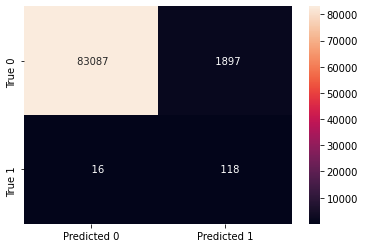

In [190]:
# Shows confusion matrix of the final tuned model
sns.heatmap(cf_m,annot=True,
            fmt='6g', 
            xticklabels=['Predicted 0','Predicted 1'],yticklabels=['True 0','True 1'])